In [505]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import seaborn as sns

In [506]:
myTrails = pd.read_csv('MyTrails.csv')
completedTrails = myTrails[pd.isna(myTrails.rating) == False] #rename to completedHikes
completedTrails.head(3)

,#,name,len,gain,days,others,year,month,shelter,route_type,...,forest,lake,river,waterfall,beach,historic_site,cave,injury,difficulty,rating
0,1,South Kaibab + Bright Angel Trail,26.4,1450,2.0,1.0,2009.0,Jul,NaN,point to point,...,0,0,1,0,0,1,0,0.0,7.0,5.0
1,2,Highland Trail Failure,10.0,130,2.0,19.0,2012.0,Jun,tent,out and back,...,1,1,1,1,1,0,0,1.0,1.0,1.0
2,3,Kepler Track,55.1,1700,3.0,0.0,2019.0,Nov,tent,point to point,...,1,1,1,1,1,0,1,0.0,7.0,5.0


In [679]:
### Quick Stats

totalDist = completedTrails.len.sum()
print("Total Distance: " + str(totalDist) + " km (" 
      + str(round(totalDist/40075, 3)) + " Earths, " 
      + str(round(totalDist/24.8, 1)) + " Liechtensteins, " 
      + str(round(totalDist/0.0299)) + " blue whales)")
totalGain = completedTrails.gain.sum()
print("Total Elevation Gain: " + str(totalGain) + " m (" 
      + str(round(totalGain/(8849-2840), 2)) + " Everests, " 
      + str(round(totalGain/830, 1)) + " Burj Khalifas, " 
      + str(round(totalGain/1.6256)) + " Nazbans)")
print("Total Days: " + str(round(completedTrails.days.sum())))
print("Number of Hikes: " + str(completedTrails.shape[0]))
print("\n")

mostDistHike = completedTrails[completedTrails.len == completedTrails.len.max()]
mostGainHike = completedTrails[completedTrails.gain == completedTrails.gain.max()]
mostDaysHike = completedTrails[completedTrails.days == completedTrails.days.max()]
print("Longest Hike: " + mostDistHike.iloc[0]["name"] + " (" + str(mostDistHike.iloc[0]["len"]) + " km)")
print("Tallest Hike: " + mostGainHike.iloc[0]["name"] + " (" + str(mostGainHike.iloc[0]["gain"]) + " m)")
if mostDaysHike.shape[0] == 1:
    print("Hike with Most Days: " + mostDaysHike.iloc[0]["name"] + " ("
          + str(round(mostDaysHike.iloc[0]["days"])) + " days)")
else:
    mostDaysMsg = "Hike with Most Days: (" + str(round(mostDaysHike.iloc[0]["days"])) + " days)\n"
    for i in range(mostDaysHike.shape[0]):
        mostDaysMsg += "    " + mostDaysHike.iloc[i]["name"]
        if i != mostDaysHike.shape[0] - 1:
            mostDaysMsg += ",\n"
    print(mostDaysMsg)
distPerDay = completedTrails.len/completedTrails.days
mostDistPerDayHike = completedTrails[completedTrails.len/completedTrails.days == distPerDay.max()]
print("Hike with Most Distance per Day: " + mostDistPerDayHike.iloc[0]["name"] + " (" + str(round(distPerDay.max(),1)) + " km/Day)")
gainPerDay = completedTrails.gain/completedTrails.days
mostGainPerDayHike = completedTrails[completedTrails.gain/completedTrails.days == gainPerDay.max()]
print("Hike with Most Elevation Gain per Day: " + mostGainPerDayHike.iloc[0]["name"] + " (" + str(round(gainPerDay.max())) + " m/Day)")
print("\n")

print("Average Distance per Hike: " + str(round(completedTrails.len.mean(), 1)) + " km")
print("Average Elevation Gain per Hike: " + str(round(completedTrails.gain.mean())) + " m")
print("Average Days per Hike: " + str(round(completedTrails.days.mean(), 1)) + " days")
print("Average Distance per Day: " + str(round(completedTrails.len.sum()/completedTrails.days.sum(), 1)) + " km")
print("Average Elevation Gain per Day: " + str(round(completedTrails.gain.sum()/completedTrails.days.sum())) + " m")
print("\n")

print("Average Rating: " + str(round(completedTrails.rating.mean(), 1)) + " (1-5 scale, middle is 3)")
print("Average Difficulty: " + str(round(completedTrails.difficulty.mean(), 2)) + " (1-7 scale, middle is 4)")
print("Average Number of People: " + str(round(completedTrails.others.mean() + 1, 1)))
print("Most Common Route Type: " + completedTrails.route_type.mode().iloc[0])
print("Most Common Shelter: " + completedTrails.shelter.mode().iloc[0])
print("Injury/Illness Rate: " + str(round(completedTrails.injury.mean(), 2)))
print("Solo Rate: " + str(round(completedTrails[completedTrails.others == 0].shape[0]/completedTrails.shape[0], 2)))
print("\n")

print("Forest Rate: " + str(round(completedTrails.forest.mean(), 2)))
print("Lake Rate: " + str(round(completedTrails.lake.mean(), 2)))
print("River Rate: " + str(round(completedTrails.river.mean(), 2)))
print("Waterfall Rate: " + str(round(completedTrails.waterfall.mean(), 2)))
print("Beach Rate: " + str(round(completedTrails.beach.mean(), 2)))
print("Historic Site Rate: " + str(round(completedTrails.historic_site.mean(), 2)))
print("Cave Rate: " + str(round(completedTrails.cave.mean(), 2)))

Total Distance: 287.3 km (0.007 Earths, 11.6 Liechtensteins, 9609 blue whales)
Total Elevation Gain: 5250 m (0.87 Everests, 6.3 Burj Khalifas, 3230 Nazbans)
Total Days: 29
Number of Hikes: 11


Longest Hike: Kepler Track (55.1 km)
Tallest Hike: Kepler Track (1700 m)
Hike with Most Days: (3 days)
    Kepler Track,
    Bruce Trail (Upper Peninsula),
    Western Uplands Trail (L1),
    Provoking Lake Loop,
    Big Salmon Lake Loop,
    Abes and Essens Lake Trail (L3),
    Eastern Pines Trail (L1)
Hike with Most Distance per Day: Kepler Track (18.4 km/Day)
Hike with Most Elevation Gain per Day: South Kaibab + Bright Angel Trail (725 m/Day)


Average Distance per Hike: 26.1 km
Average Elevation Gain per Hike: 477 m
Average Days per Hike: 2.6 days
Average Distance per Day: 9.9 km
Average Elevation Gain per Day: 181 m


Average Rating: 3.2 (1-5 scale, middle is 3)
Average Difficulty: 3.91 (1-7 scale, middle is 4)
Average Number of People: 3.5
Most Common Route Type: loop
Most Common Shelter: 

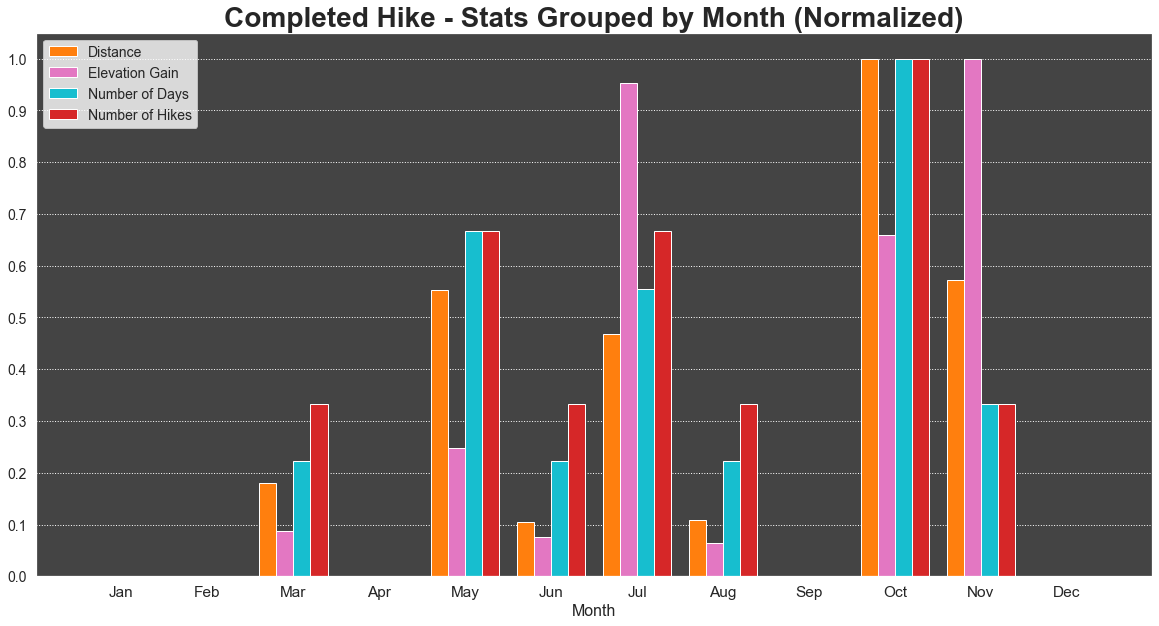

<Figure size 1152x216 with 0 Axes>

In [684]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthDists = np.zeros(12)
monthGains = np.zeros(12)
monthDays = np.zeros(12)
monthHikes = np.zeros(12)

def addToMonth(i, _hike):
    monthDists[i] += _hike.len
    monthGains[i] += _hike.gain
    monthDays[i] += _hike.days
    monthHikes[i] += 1

for i, hike in completedTrails.iterrows():
    currentMonth = str(hike.month)
    if currentMonth == months[0]:
        addToMonth(0, hike)
    elif currentMonth == months[1]:
        addToMonth(1, hike)
    elif currentMonth == months[2]:
        addToMonth(2, hike)
    elif currentMonth == months[3]:
        addToMonth(3, hike)
    elif currentMonth == months[4]:
        addToMonth(4, hike)
    elif currentMonth == months[5]:
        addToMonth(5, hike)
    elif currentMonth == months[6]:
        addToMonth(6, hike)
    elif currentMonth == months[7]:
        addToMonth(7, hike)
    elif currentMonth == months[8]:
        addToMonth(8, hike)
    elif currentMonth == months[9]:
        addToMonth(9, hike)
    elif currentMonth == months[10]:
        addToMonth(10, hike)
    elif currentMonth == months[11]:
        addToMonth(11, hike)
        
# Normalizing
monthDists = monthDists/np.max(monthDists)
monthGains = monthGains/np.max(monthGains)
monthDays = monthDays/np.max(monthDays)
monthHikes = monthHikes/np.max(monthHikes)

# Plotting
X_axis = np.arange(len(months))
  
plt.bar(X_axis - 0.3, monthDists, 0.2, label = 'Distance', color="tab:orange")
plt.bar(X_axis - 0.1, monthGains, 0.2, label = 'Elevation Gain', color="tab:pink")
plt.bar(X_axis + 0.1, monthDays, 0.2, label = 'Number of Days', color="tab:cyan")
plt.bar(X_axis + 0.3, monthHikes, 0.2, label = 'Number of Hikes', color="tab:red")
  
plt.xticks(X_axis, months)
plt.xlabel("Month", size="16")
ax = plt.gca()
ax.set_title("Completed Hike - Stats Grouped by Month (Normalized)", size=28, fontweight="bold")
plt.legend(loc=2, facecolor="w", prop={'size': 14})
plt.rcParams['axes.facecolor'] = '#444444'
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.grid(axis="y", which="both", linestyle= 'dotted')
plt.grid(axis="x", which="both", linestyle= 'none')
ax.tick_params(axis='y', which='both', labelsize=14)
plt.locator_params(axis='y', nbins=11)
plt.show()
plt.clf()
            

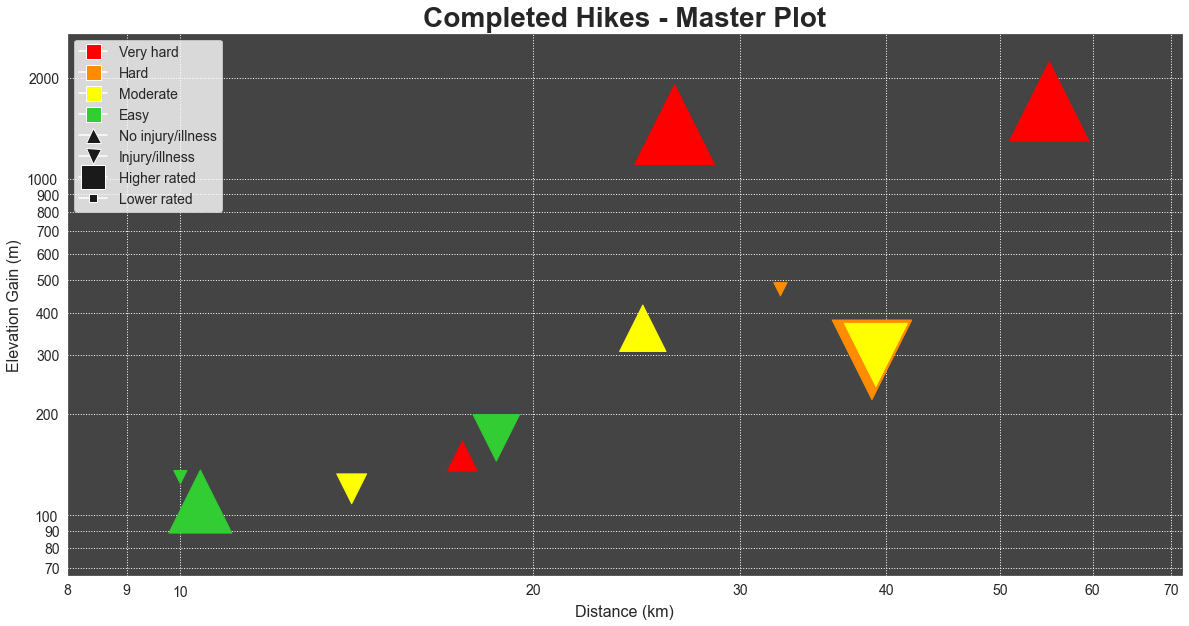

<Figure size 1440x288 with 0 Axes>

In [694]:
injDist = []
injGain = []
injRating = []
injDifficulty = []
uninjDist = []
uninjGain = []
uninjRating = []
uninjDifficulty = []

for i, hike in completedTrails.iterrows():
    if hike.injury == 1:
        injDist.append(hike.len) # Make into function
        injGain.append(hike.gain)
        injRating.append((hike.rating - 0.2)**2*completedTrails.len.max()*5)
        if hike.difficulty == 1:
            injDifficulty.append(0)
        elif hike.difficulty == 3:
            injDifficulty.append(1)
        elif hike.difficulty == 5:
            injDifficulty.append(2)
        elif hike.difficulty == 7:
            injDifficulty.append(3)
    else:
        uninjDist.append(hike.len)
        uninjGain.append(hike.gain)
        uninjRating.append((hike.rating-0.2)**2*completedTrails.len.max()*5)
        if hike.difficulty == 1:
            uninjDifficulty.append(0)
        elif hike.difficulty == 3:
            uninjDifficulty.append(1)
        elif hike.difficulty == 5:
            uninjDifficulty.append(2)
        elif hike.difficulty == 7:
            uninjDifficulty.append(3)

# Plotting
colors = np.array(["limegreen", "yellow", "darkorange", "red"])
X_axis = np.arange(len(months))

plt.scatter(injDist,
            injGain,
            s = injRating,
            c = colors[injDifficulty],
            marker = "v")
plt.scatter(uninjDist,
            uninjGain,
            s= uninjRating,
            c = colors[uninjDifficulty],
            marker = "^")
  
plt.rcParams['axes.facecolor'] = '#444444'
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(completedTrails.len.min()*0.8, completedTrails.len.max()*1.3) # TODO use consistent spacing and quotes
ax.set_ylim(completedTrails.gain.min()*0.6, completedTrails.gain.max()*1.6)
plt.xlabel("Distance (km)", size=16)
plt.ylabel("Elevation Gain (m)", size=16)
plt.grid(axis="both", which="both", linestyle= 'dotted')
ax.tick_params(axis='both', which='both', labelsize=14)
ax.xaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax.set_title('Completed Hikes - Master Plot', size=28, fontweight="bold")

legend_elements = [Line2D([0], [0], marker='s', color='w', label='Very hard', markerfacecolor=colors[3], markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='Hard', markerfacecolor=colors[2], markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='Moderate', markerfacecolor=colors[1], markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='Easy', markerfacecolor=colors[0], markersize=15),
                   Line2D([0], [0], marker='^', color='w', label='No injury/illness', markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='v', color='w', label='Injury/illness', markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='Higher rated', markerfacecolor='k', markersize=24),
                   Line2D([0], [0], marker='s', color='w', label='Lower rated', markerfacecolor='k', markersize=8)]
ax.legend(handles=legend_elements, facecolor="w", prop={'size': 14})

plt.show()
plt.clf()
            

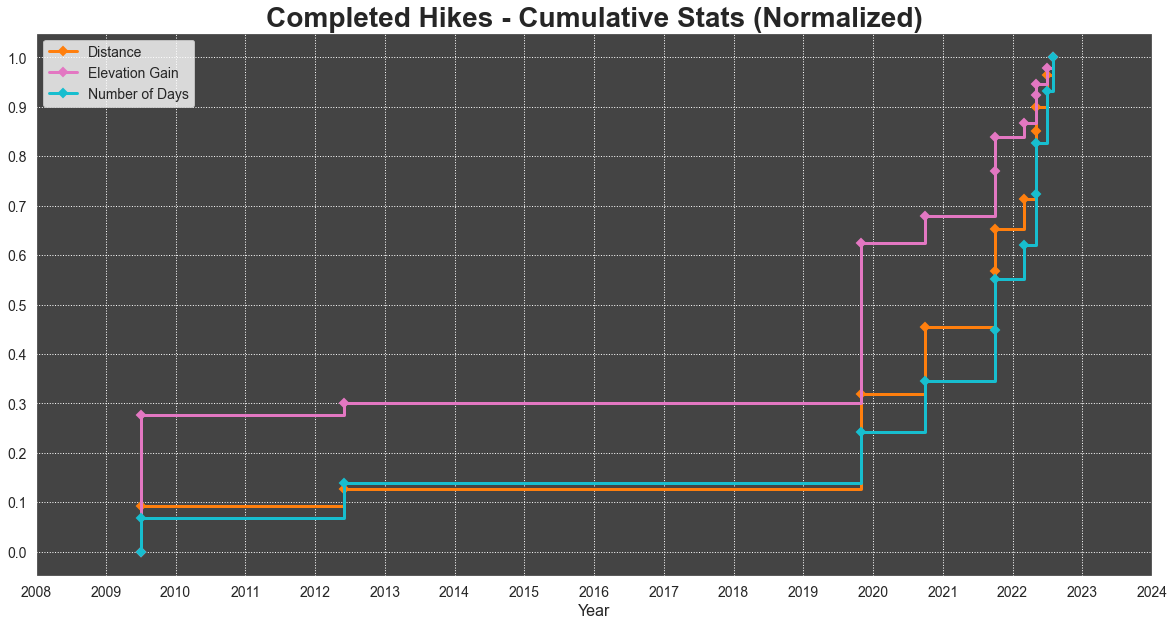

<Figure size 1440x288 with 0 Axes>

In [693]:
def monthToYears(month):
    return months.index(month)/12
    

cumulativeDist = []
cumulativeGain = []
cumulativeDays = []
year = []

# Cumulate
for i, hike in completedTrails.iterrows():
    if i == 0:
        cumulativeDist.append(0)
        cumulativeGain.append(0)
        cumulativeDays.append(0)
        year.append(hike.year + monthToYears(hike.month))
        cumulativeDist.append(hike.len)
        cumulativeGain.append(hike.gain)
        cumulativeDays.append(hike.days)
        year.append(hike.year + monthToYears(hike.month))
    else:
        cumulativeDist.append(cumulativeDist[i] + hike.len)
        cumulativeGain.append(cumulativeGain[i] + hike.gain)
        cumulativeDays.append(cumulativeDays[i] + hike.days)
        year.append(hike.year + monthToYears(hike.month))

ax = plt.gca()
ax.set_title("Completed Hikes - Cumulative Stats (Normalized)", size=28, fontweight="bold")
plt.step(year, cumulativeDist/np.max(cumulativeDist), label="Distance", where="post", linewidth=3, marker="D", mew=2, color="tab:orange")
plt.step(year, cumulativeGain/np.max(cumulativeGain), label="Elevation Gain", where="post", linewidth=3, marker="D", mew=2, color="tab:pink")
plt.step(year, cumulativeDays/np.max(cumulativeDays), label="Number of Days", where="post", linewidth=3, marker="D", mew=2, color="tab:cyan")
fig = plt.gcf()
fig.set_size_inches(20, 10) # TODO make this common
plt.rcParams['axes.facecolor'] = '#444444'
plt.grid(axis="both", which="both", linestyle= 'dotted')
ax.tick_params(axis='both', which='both', labelsize=14)
plt.legend(facecolor="w", prop={'size': 14})
plt.locator_params(axis='y', nbins=11, )
plt.xlabel("Year", size="16")
plt.xticks(ticks=range(int(completedTrails.year.min()) - 1, int(completedTrails.year.max()) + 3))
plt.show()
plt.clf()


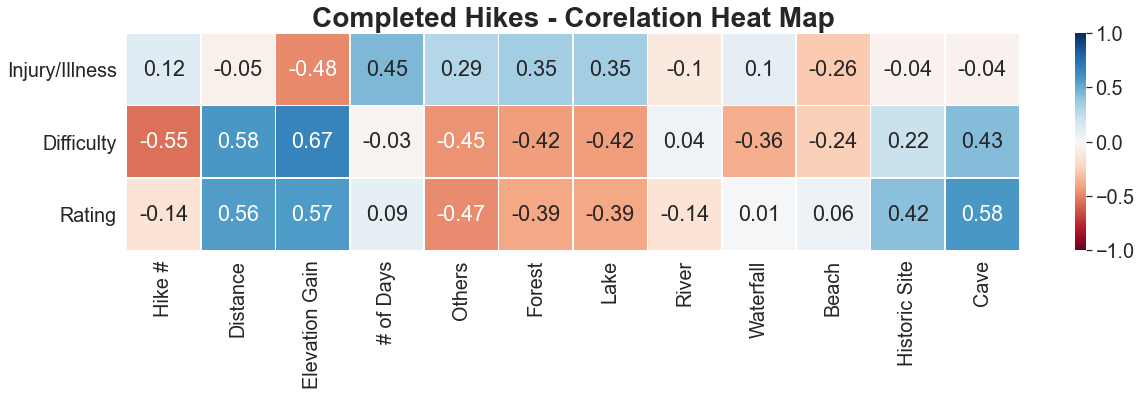

<function matplotlib.pyplot.clf()>

In [689]:
corr = completedTrails.corr().round(2)
corr = corr.iloc[15:,:-3]
corr = corr.drop(['lat','lng','year'],axis=1)
x_labels=['Hike #','Distance','Elevation Gain','# of Days','Others','Forest','Lake','River','Waterfall','Beach','Historic Site','Cave']
y_labels=["Injury/Illness", "Difficulty", "Rating"]
sns.set(rc={"figure.figsize":(20,4)})
sns.set(font_scale=1.8)
heatmap = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap="RdBu", linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
ax = plt.gca()
ax.set_title("Completed Hikes - Corelation Heat Map", size=28, fontweight="bold")
plt.rcParams['axes.facecolor'] = '#444444'
plt.show()
plt.clf